# Support Vector Regression

### Load Data

In [1]:
df = pd.read_csv(r"C:\Users\Gk\Documents\dev\data\LinearRegression_Football_data\df_visual.csv", encoding='utf-8')

In [2]:
pd.options.display.max_columns = len(df.columns)

In [3]:
df = df.drop(['Unnamed: 0', 'nationality'], axis=1)

In [4]:
df_0 = df.groupby("player_name", as_index=None).mean()

In [5]:
df_0 = df_0.drop('player_name', axis=1)

In [6]:
df_nf = df_0.drop('follower', axis=1)

# No Follower

# Gaussian

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

z = 10
cVal = list(range(25, 200, 5))
scores_rm = np.zeros([len(cVal), 3, z])
num = 0
mseListNf = []

cv = KFold(z, shuffle=True, random_state=0)
for c in cVal:
    for i, (idx_train, idx_test) in enumerate(cv.split(df_nf)):
        
        df_train = df_nf.iloc[idx_train]
        df_test = df_nf.iloc[idx_test]

        X_train = df_train.drop('value', axis=1).astype(float)
        X_train = StandardScaler().fit_transform(X_train)
        y_train = df_train['value']

        model = SVR(kernel="rbf", C=c)
        result = model.fit(X_train, y_train)


        pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
        rsquared = r2_score(df_test.value, pred)
        mse = mean_squared_error(df_test.value, pred)
        
        scores_rm[num, 0, i] = rsquared
        scores_rm[num, 1, i] = mse
        scores_rm[num, 2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])

    #     print("R2 = {:.8f}".format(rsquared))
    #     print("R2 Score = {:.8f}".format(scores_rm[2, i]))
    #     print("mse = {:.8f}".format(mse))

#     print("C : {} | 모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(c, scores_rm[num, 0].mean(), scores_rm[num, 2].mean(), scores_rm[num, 1].mean()))
    mseListNf.append(scores_rm[num, 1].mean())
    num += 1
    

C : 65 | 모델 성능 : Metrics R2 = 0.1958160578104448, R2 Score = -0.08571903676155505, mse = 343.35616104515447

---

# Follower

# Gaussian

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

z = 10
cVal = list(range(25, 200, 5))
scores_rm = np.zeros([len(cVal), 3, z])
num = 0
mseList = []

cv = KFold(z, shuffle=True, random_state=0)
for c in cVal:
    for i, (idx_train, idx_test) in enumerate(cv.split(df_0)):
        
        df_train = df_0.iloc[idx_train]
        df_test = df_0.iloc[idx_test]

        X_train = df_train.drop('value', axis=1).astype(float)
        X_train = StandardScaler().fit_transform(X_train)
        y_train = df_train['value']

        model = SVR(kernel="rbf", C=c)
        result = model.fit(X_train, y_train)


        pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
        rsquared = r2_score(df_test.value, pred)
        mse = mean_squared_error(df_test.value, pred)
        
        scores_rm[num, 0, i] = rsquared
        scores_rm[num, 1, i] = mse
        scores_rm[num, 2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])

    #     print("R2 = {:.8f}".format(rsquared))
    #     print("R2 Score = {:.8f}".format(scores_rm[2, i]))
    #     print("mse = {:.8f}".format(mse))

#     print("C : {} | 모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(c, scores_rm[num, 0].mean(), scores_rm[num, 2].mean(), scores_rm[num, 1].mean()))
    mseList.append(scores_rm[num, 1].mean())
    num += 1
    

C : 65 | 모델 성능 : Metrics R2 = 0.2202634549867514, R2 Score = -0.13130556391975853, mse = 323.8671907347049

C:\Users\Gk\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


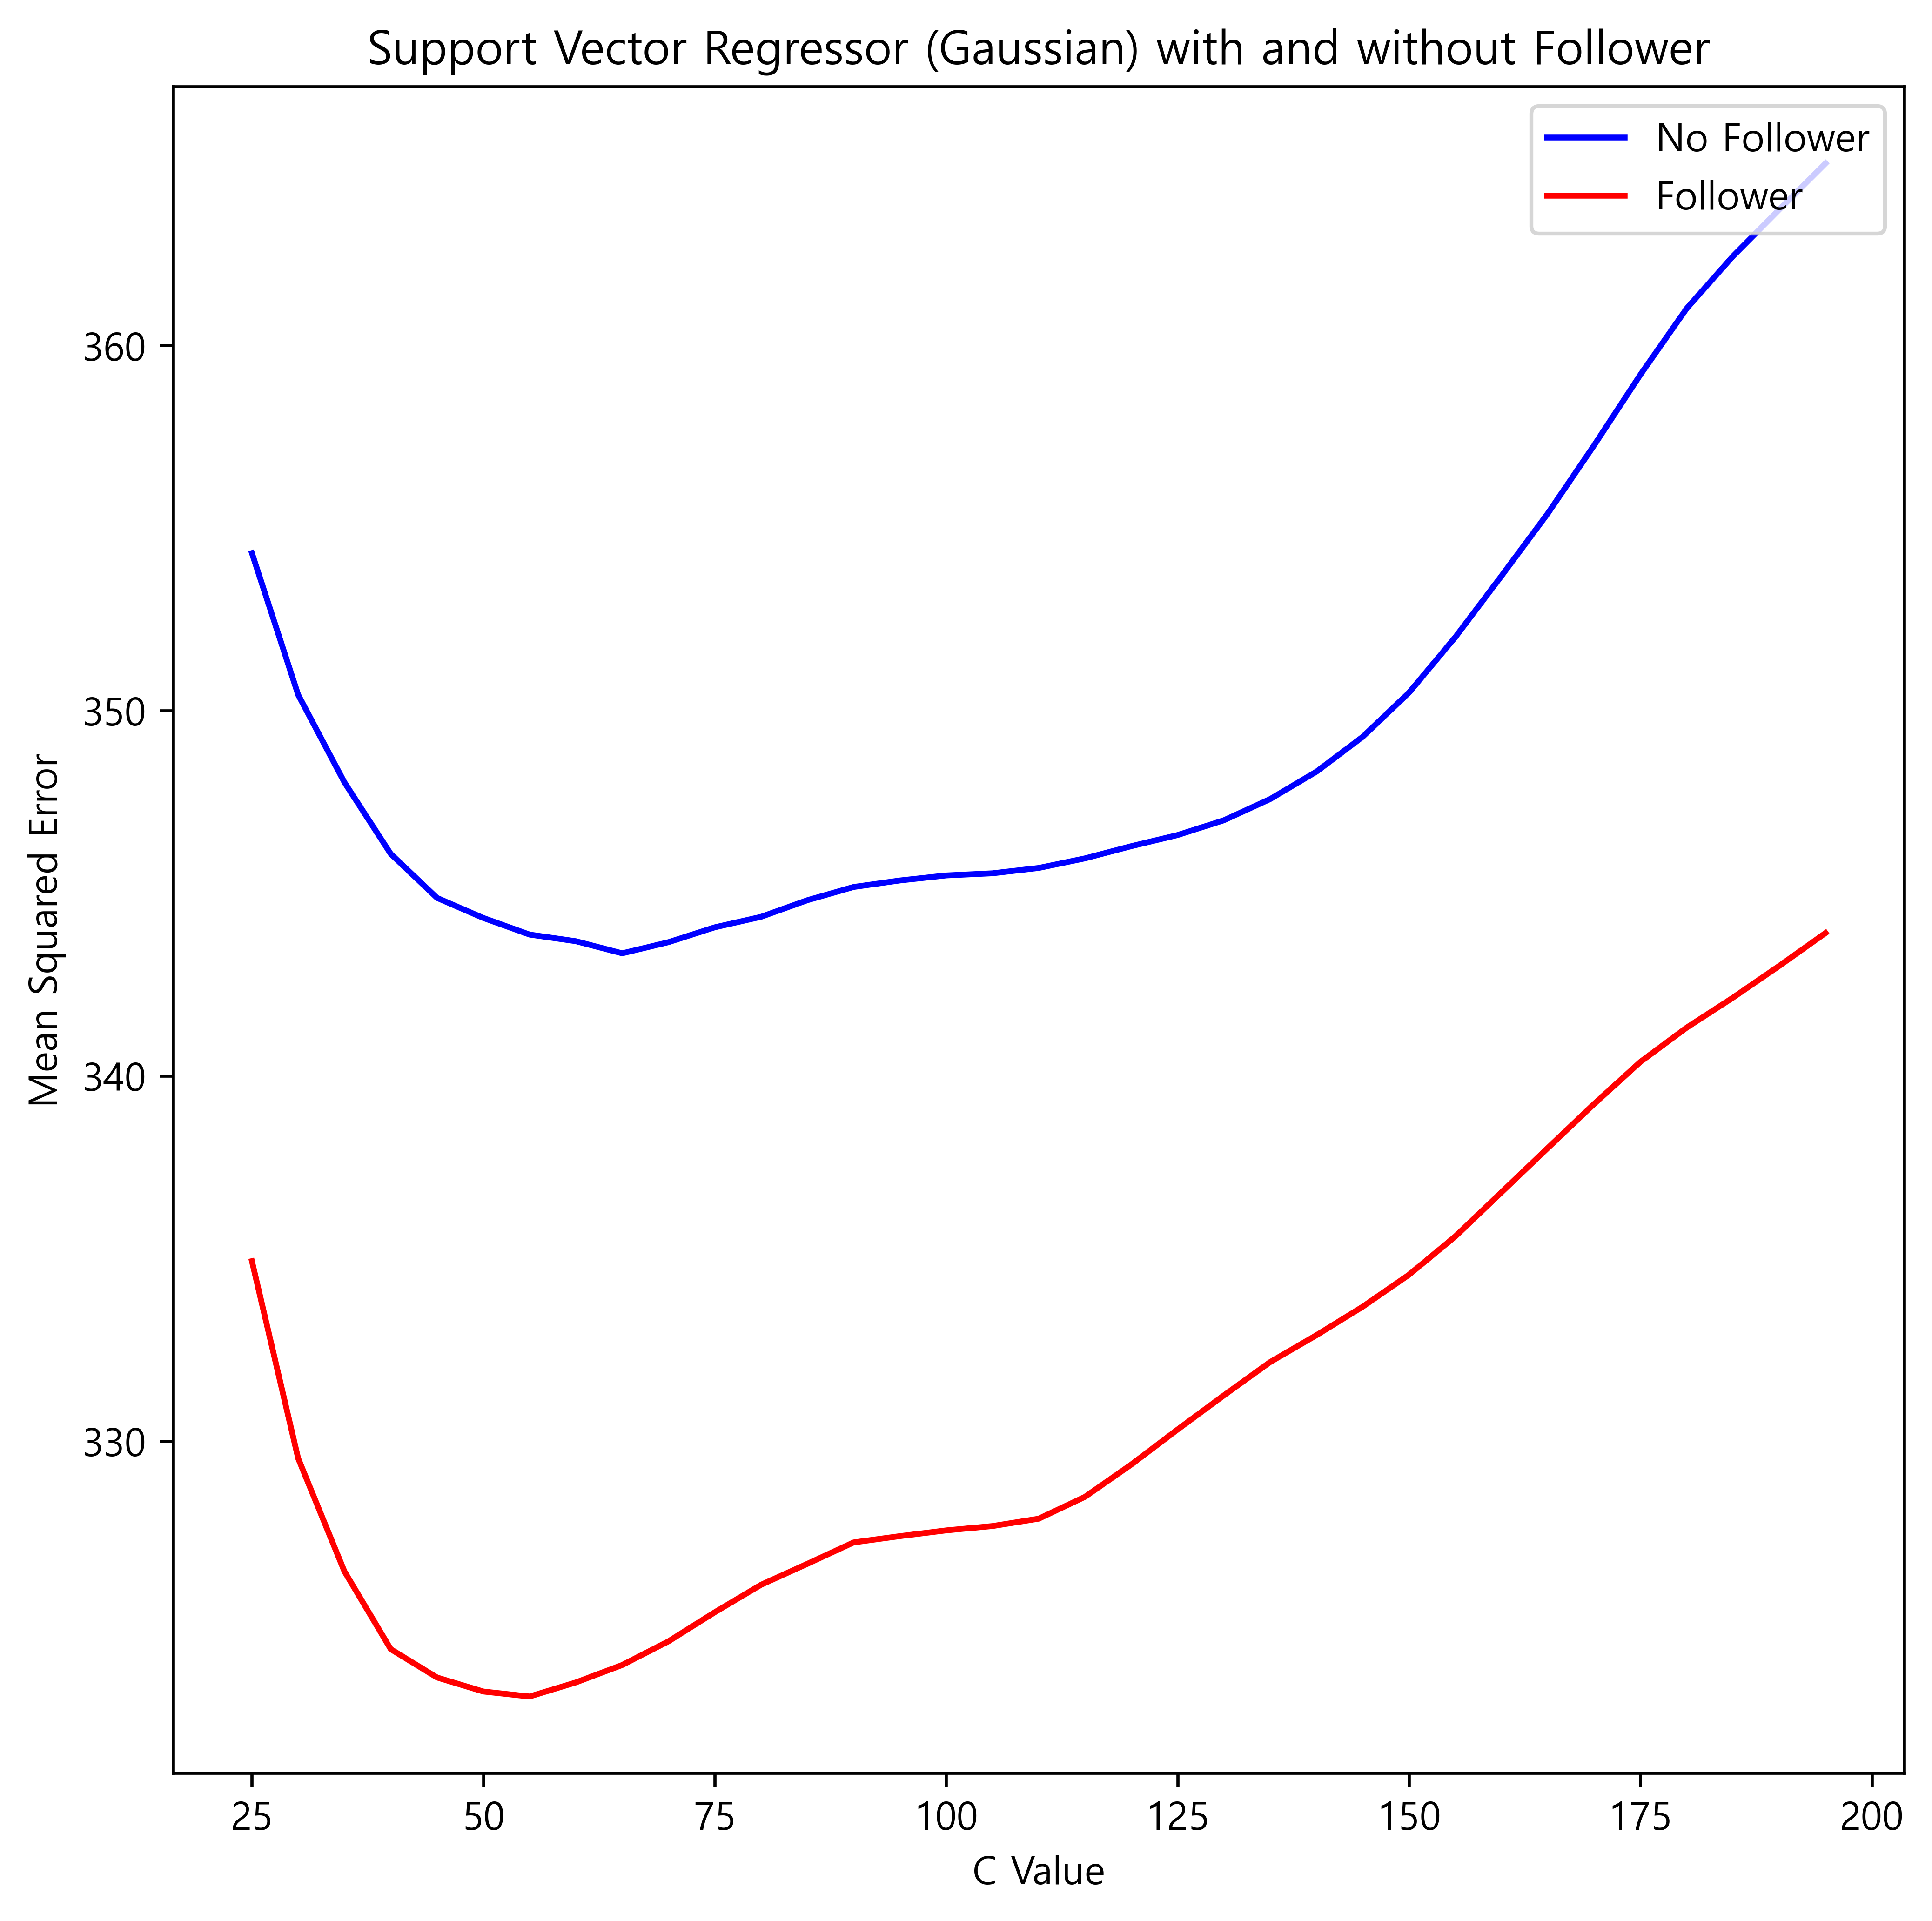

In [14]:
cVal = list(range(25, 200, 5))
fig = plt.figure()
fig.show()
ax = fig.add_subplot(111)

ax.plot(cVal, mseListNf, color='blue', label='No Follower')
ax.plot(cVal, mseList, color='red', label='Follower')
plt.legend(loc='upper right')
plt.title('Support Vector Regressor (Gaussian) with and without Follower')
plt.xlabel('C Value')
plt.ylabel('Mean Squared Error')
plt.draw()

In [15]:
mseListNf

[354.3154809565993,
 350.43451251765856,
 348.03582540922764,
 346.0783739937068,
 344.8736892040848,
 344.324754798454,
 343.86930357390366,
 343.6873309590961,
 343.35616104515447,
 343.66072069607384,
 344.0679194744863,
 344.35564403617127,
 344.8098833148368,
 345.1726437086817,
 345.3509283654503,
 345.48869617734346,
 345.5474448957074,
 345.69341605163197,
 345.9566573669363,
 346.2902751342932,
 346.5945160233874,
 346.9993545055083,
 347.5803042662501,
 348.33083421625724,
 349.28540665936555,
 350.4942069822002,
 352.01183538320646,
 353.6925683322062,
 355.40318766436786,
 357.26833007149054,
 359.2024806056823,
 361.0148717675669,
 362.44684113078335,
 363.72338274586815,
 364.98788888027946]

In [16]:
mseList

[334.92714918521585,
 329.5240813456656,
 326.4283331251939,
 324.3008804403222,
 323.5255366596809,
 323.1412782254837,
 323.0045532612056,
 323.3902992235486,
 323.8671907347049,
 324.51524017251353,
 325.31116257593146,
 326.06394161082375,
 326.63780277018134,
 327.22407140617116,
 327.3965982696068,
 327.55370395968265,
 327.6718301292654,
 327.87394484398874,
 328.4731012576168,
 329.3571285704807,
 330.3156558498384,
 331.2507457529215,
 332.16312672293833,
 332.8987846544312,
 333.67918007384594,
 334.55429348002554,
 335.6028506015679,
 336.81408996167863,
 338.0256298422133,
 339.2319045661649,
 340.3834358279537,
 341.32191199056535,
 342.1427019942995,
 343.0121473899601,
 343.9119880198782]